In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
#read in boil water csv and clean out Nulls and add state column
bw_advisories = pd.read_csv(r"C:\Users\saman\Desktop\SI405-485\Final\finalbwa.csv")
v1 = bw_advisories[["title","date","year","location","link","cause","specific_location"]]
v2 = v1[v1["title"].notna()]
v2['state'] = v2['location'].str[-2:]

#remove duplicate articles keeping only the first occurance -- duplicates have the same title, date, and state
v3 = v2.drop_duplicates(subset=['title', 'date','state'])
v3

,title,date,year,location,link,cause,specific_location,state
0,Better sa fe thansorry - Areas of Big Rapids p...,5-Dec-18,2018,"Big Rapids, MI",https://infoweb-newsbank-com.proxy.lib.umich.e...,"['boil water advisory', 'loss in water pressur...","['Big Rapids,MI']",MI
1,Downtown Detroit boil water advisory to last u...,14-Jan-19,2019,MI,https://infoweb-newsbank-com.proxy.lib.umich.e...,"['boil water advisory', 'water main break', 'b...","['Detroit,MI', 'Lake,MI', 'Garden,MI']",MI
2,"Detroit News, The (MI): Page 13",14-Jan-19,2019,MI,https://infoweb-newsbank-com.proxy.lib.umich.e...,,,MI
3,Columbus' boil water policy similar to other c...,22-Jun-17,2017,"Columbus, IN",https://infoweb-newsbank-com.proxy.lib.umich.e...,"['water main break', 'bacteria found in water']","['Valparaiso,IN', 'Howe,IN', 'Columbus,IN', 'B...",IN
4,Troy's boil-water alert lifted after 3 days,13-Nov-16,2016,MI,https://infoweb-newsbank-com.proxy.lib.umich.e...,"['water main break', 'bacteria found in water']","['Troy,MI', 'Lake,MI', 'Rochester,MI', 'Cedar,...",MI
...,...,...,...,...,...,...,...,...
18457,Life-saving Cold Weather Advice,22-Jan-09,2009,NY,https://infoweb-newsbank-com.proxy.lib.umich.e...,['do not drink advisory'],"['Nassau,NY', 'Great Neck,NY', 'Cedarhurst,NY'...",NY
18458,M-F Morning News - 05:28:04,17-Mar-09,2009,"Wilkes Barre-Scranton, PA",https://infoweb-newsbank-com.proxy.lib.umich.e...,['do not drink advisory'],[],PA
18459,Verrier: The economic impacts of harmful algal...,3-Aug-17,2017,"Auburn, NY",https://infoweb-newsbank-com.proxy.lib.umich.e...,"['do not drink advisory', 'bacteria found in w...","['Cayuga,NY']",NY
18460,From Georgina Cranston Greencastle-Antrim Cham...,6-Apr-17,2017,"Greencastle, PA",https://infoweb-newsbank-com.proxy.lib.umich.e...,['do not drink advisory'],[],PA


In [5]:
#Some articles have incorrect location/state information due to formatting.  We remove those outliers below
final = v3[v3["state"] != "ss" ]
final_v2 = final[final["state"] != "he" ]
final_v3 = final_v2[final_v2["state"] != "AL" ]

#in the cleaned version add a counte column with value set to 1
final_v3["counter"] = 1
final_v3

,title,date,year,location,link,cause,specific_location,state,counter
0,Better sa fe thansorry - Areas of Big Rapids p...,5-Dec-18,2018,"Big Rapids, MI",https://infoweb-newsbank-com.proxy.lib.umich.e...,"['boil water advisory', 'loss in water pressur...","['Big Rapids,MI']",MI,1
1,Downtown Detroit boil water advisory to last u...,14-Jan-19,2019,MI,https://infoweb-newsbank-com.proxy.lib.umich.e...,"['boil water advisory', 'water main break', 'b...","['Detroit,MI', 'Lake,MI', 'Garden,MI']",MI,1
2,"Detroit News, The (MI): Page 13",14-Jan-19,2019,MI,https://infoweb-newsbank-com.proxy.lib.umich.e...,,,MI,1
3,Columbus' boil water policy similar to other c...,22-Jun-17,2017,"Columbus, IN",https://infoweb-newsbank-com.proxy.lib.umich.e...,"['water main break', 'bacteria found in water']","['Valparaiso,IN', 'Howe,IN', 'Columbus,IN', 'B...",IN,1
4,Troy's boil-water alert lifted after 3 days,13-Nov-16,2016,MI,https://infoweb-newsbank-com.proxy.lib.umich.e...,"['water main break', 'bacteria found in water']","['Troy,MI', 'Lake,MI', 'Rochester,MI', 'Cedar,...",MI,1
...,...,...,...,...,...,...,...,...,...
18457,Life-saving Cold Weather Advice,22-Jan-09,2009,NY,https://infoweb-newsbank-com.proxy.lib.umich.e...,['do not drink advisory'],"['Nassau,NY', 'Great Neck,NY', 'Cedarhurst,NY'...",NY,1
18458,M-F Morning News - 05:28:04,17-Mar-09,2009,"Wilkes Barre-Scranton, PA",https://infoweb-newsbank-com.proxy.lib.umich.e...,['do not drink advisory'],[],PA,1
18459,Verrier: The economic impacts of harmful algal...,3-Aug-17,2017,"Auburn, NY",https://infoweb-newsbank-com.proxy.lib.umich.e...,"['do not drink advisory', 'bacteria found in w...","['Cayuga,NY']",NY,1
18460,From Georgina Cranston Greencastle-Antrim Cham...,6-Apr-17,2017,"Greencastle, PA",https://infoweb-newsbank-com.proxy.lib.umich.e...,['do not drink advisory'],[],PA,1


BREAKING DOWN DATA BY STATE

In [6]:
#to get a table of number of articles per state
byState = final_v3.groupby("state").sum().drop("year",axis=1).sort_values(by="counter",ascending=False)
byState

,counter
state,
NY,4119
PA,3784
IL,2885
OH,2148
IN,1955
MI,1937
MN,936
WI,559


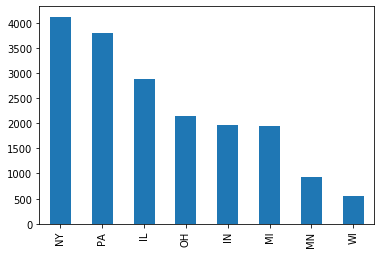

In [7]:
#to get graph of number of article per state
import seaborn as sns
final_v3['state'].value_counts().plot(kind='bar');

BREAKING DOWN DATA BY YEAR

In [9]:
#to get a table of number of articles per year
byYear = final_v3.groupby('year').sum().sort_values(by="counter",ascending=False)
byYear

,counter
year,
2014,1825
2017,1662
2015,1553
2019,1550
2018,1540
2016,1526
2013,1523
2011,1481
2007,1227


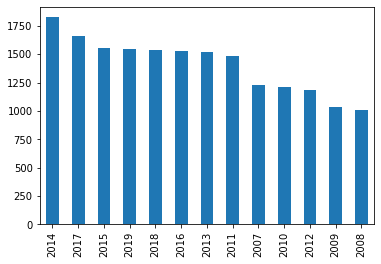

In [10]:
#to get graph of number of article per year
final_v3['year'].value_counts().plot(kind='bar');

BY STATE AND YEAR

In [12]:
#total number of articles for each state by year
byState_Year = final_v3.groupby(["state",'year']).sum().sort_values(by="counter",ascending=False)
byState_Year

counter
state year         
NY    2019      450
PA    2017      399
      2014      397
NY    2018      387
      2011      363
...             ...
WI    2009       37
      2011       36
      2018       36
      2012       33
      2019       10

[104 rows x 1 columns]

BREAKING DOWN DATA BY CAUSE (SIMILAR STRUCUTRE WOULD BE FOLLOWED FOR SPECIFIC LOCATION)

In [13]:
#create new dataframe for the cause list. Split the list of causes into seperate columns.
final_v4 = final_v3["cause"].str.split(',', expand=True)
final_v4

,0,1,2,3,4
0,['boil water advisory','loss in water pressure','contaminants','bacteria found in water'],None
1,['boil water advisory','water main break','bacteria found in water'],None,None
2,,None,None,None,None
3,['water main break','bacteria found in water'],None,None,None
4,['water main break','bacteria found in water'],None,None,None
...,...,...,...,...,...
18457,['do not drink advisory'],None,None,None,None
18458,['do not drink advisory'],None,None,None,None
18459,['do not drink advisory','bacteria found in water'],None,None,None
18460,['do not drink advisory'],None,None,None,None


In [15]:
#find the value counts for each cause in each column
zero = final_v4[0].value_counts()
one = final_v4[1].value_counts()
two = final_v4[2].value_counts()
three = final_v4[3].value_counts()
four = final_v4[4].value_counts()

In [16]:
#look at numbers from first column
zero

['boil water advisory']        7228
                               3153
['boil water advisory'         2690
['do not drink advisory']      2350
['bacteria found in water']     771
['water main break']            720
['water main break'             695
['bacteria found in water'      458
['do not drink advisory'        102
['contaminants'                  70
['contaminants']                 68
['loss in water pressure']       10
['loss in water pressure'         8
Name: 0, dtype: int64

In [17]:
#look at numbers from second column
one

 'water main break']           1323
 'bacteria found in water']    1131
 'boil water advisory']         771
 'water main break'             260
 'contaminants']                160
 'bacteria found in water'      123
 'boil water advisory'           96
 'do not drink advisory']        78
 'contaminants'                  53
 'loss in water pressure'        11
 'loss in water pressure']       10
 'do not drink advisory'          7
Name: 1, dtype: int64

In [18]:
#look at numbers from third column
two

 'bacteria found in water']    273
 'contaminants']                95
 'boil water advisory']         79
 'water main break']            48
 'bacteria found in water'      14
 'contaminants'                 12
 'do not drink advisory']        9
 'water main break'              5
 'do not drink advisory'         5
 'loss in water pressure']       5
 'boil water advisory'           4
 'loss in water pressure'        1
Name: 2, dtype: int64

In [19]:
#look at numbers from fourth column
three

 'bacteria found in water']    17
 'contaminants']               13
 'water main break']            5
 'boil water advisory']         3
 'do not drink advisory']       1
 'bacteria found in water'      1
 'loss in water pressure']      1
Name: 3, dtype: int64

In [20]:
#look at numbers from fifth column
four

 'contaminants']    1
Name: 4, dtype: int64

In [22]:
#these numbers were found by manually adding the above results
boilwater = 10871
donotdrink = 2552
pdf_empty = 3153

watermainbreak = 3056
bacteria = 2788
contaminants = 472
pressureloss = 49
pdf_empty = 3153

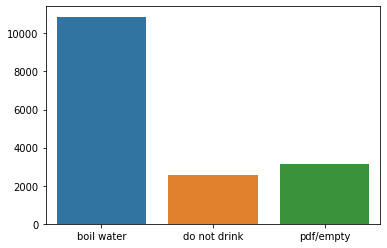

In [23]:
#bar chart visualizations
x = ["boil water","do not drink","pdf/empty"]
y = [10871,2552,3153]
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x, y)
plt.show()

In [24]:
#table visualization
data = {'boil water': [10871], 'do not drink': [2552],'pdf/empty':[3153]}
df = pd.DataFrame(data=data)
df.T

,0
boil water,10871
do not drink,2552
pdf/empty,3153


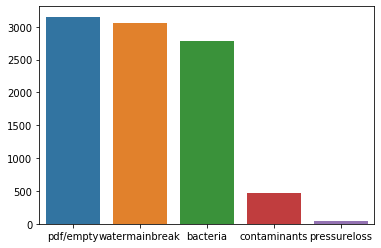

In [25]:
#bar chart visualization
x = ["pdf/empty","watermainbreak","bacteria","contaminants","pressureloss"]
y = [3153,3056,2788,472,49]

import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x, y)
plt.show()

In [26]:
data2 = {'pdf/empty': [3153], 'water main break': [3056],'bacteria found':[2788],'contaminants found':[472],'loss in pressure':[49]}
df2 = pd.DataFrame(data=data2)
df2.T

,0
pdf/empty,3153
water main break,3056
bacteria found,2788
contaminants found,472
loss in pressure,49


In [27]:
#save cleaned dataframe
final_v3.to_csv(r"C:\\Users\saman\Desktop\SI405-485\\Final\finalbwa.csv")